# PREDICTION USING SUPERVISED ML

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import linear_model
from sklearn.utils import shuffle
import pickle

In [2]:
data = pd.read_csv('http://bit.ly/w-data')
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 532.0 bytes


In [4]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


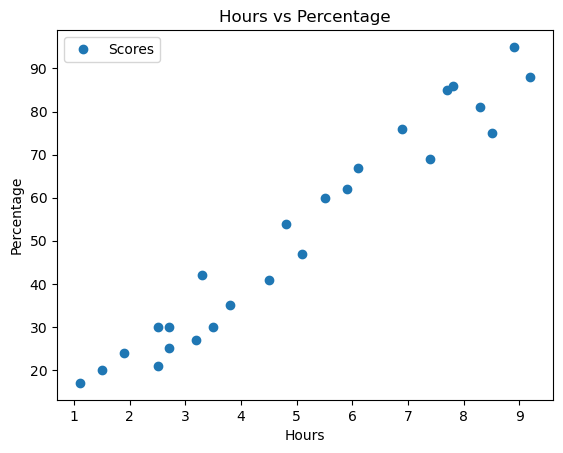

In [5]:
data.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours')  
plt.ylabel('Percentage')  
plt.show()

The relation Matrix


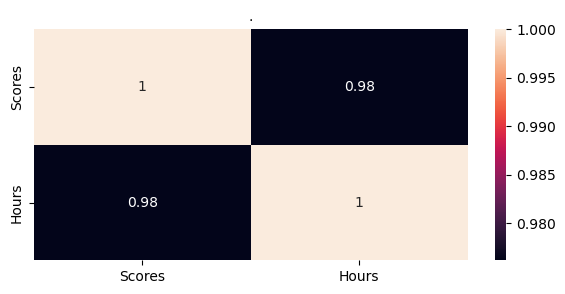

In [6]:
plt.figure(figsize=(7,3))
sns.heatmap(data[['Scores','Hours']].corr(), annot = True)
plt.title('.', fontsize = 10)
print('The relation Matrix')
plt.show()

<Axes: xlabel='Hours'>

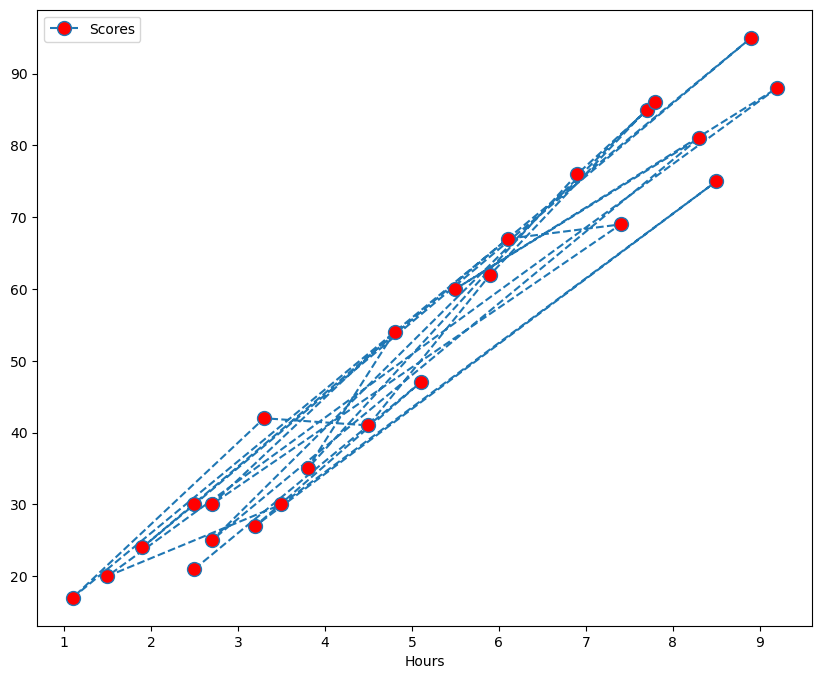

In [8]:
data.plot("Hours","Scores",linestyle = "--",marker = "o",markersize = "10",markerfacecolor = "red", figsize=(10,8))

In [9]:
x = data.iloc[:, :-1].values
y = data.iloc[:, 1].values

In [10]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x,y, test_size=0.1)

In [11]:
best = 0
for _ in range(15):
    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x,y, test_size=0.2)

    linear = linear_model.LinearRegression()
    linear.fit(x_train, y_train) 
    acc = linear.score(x_test, y_test)
   

    if acc > best:
        best = acc
        with open("student_model.pickle", "wb") as f: 
            pickle.dump(linear, f) 
print(" Best Accuracy: ",best)

 Best Accuracy:  0.975298348220467


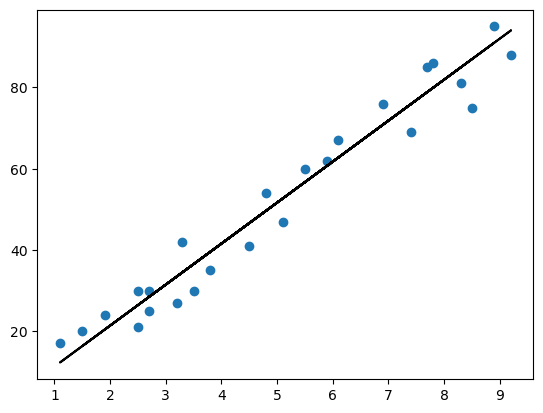

In [12]:
line = linear.coef_*x+linear.intercept_
plt.scatter (x,y)
plt.plot (x, line, color = 'Black')
plt.show()

In [13]:
pickle_in = open("student_model.pickle", "rb") 
linear = pickle.load(pickle_in) 
prediction = linear.predict(x_test)
print(x_test,prediction)

[[4.8]
 [4.5]
 [9.2]
 [1.9]
 [8.3]] [49.29537971 46.27017815 93.66500262 20.05176462 84.58939793]


In [14]:
data = pd.DataFrame({'Actual': y_test, 'Predicted': prediction})


In [15]:
data

,Actual,Predicted
0,54,49.295380
1,41,46.270178
2,88,93.665003
3,24,20.051765
4,81,84.589398


In [16]:
print("Training score:", linear.score(x_train, y_train))
print("Testing score:", linear.score(x_test, y_test))

Training score: 0.9487696548827371
Testing score: 0.961763524651317


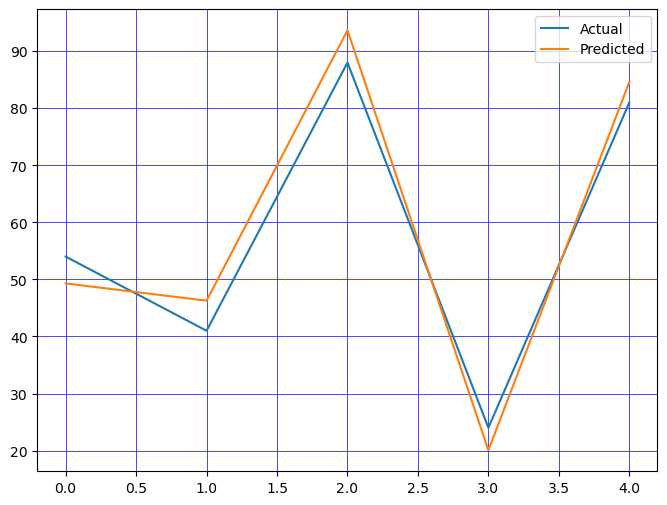

In [17]:
data.plot(kind='line', figsize=(8,6))
plt.grid(which='major', linewidth='0.5', color = 'black')
plt.grid(which='major', linewidth='0.5', color = 'blue')
plt.show()

In [18]:
hours = 9.25
test = np.array([hours])
test = test.reshape(-1,1)
own_pred = linear.predict(test)
print ("No. of Hours = {}".format(hours))
print ("Predicted Score = {}".format(own_pred[0]))

No. of Hours = 9.25
Predicted Score = 94.16920287673834


In [19]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, prediction)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, prediction))
print('Root mean squared Error:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

Mean Absolute Error: 4.635486873607822
Mean Squared Error: 22.094564915483012
Root mean squared Error: 4.700485604220378
